In [2]:
import stmpy
from scipy.signal import hilbert
%pylab inline
# pylab.style.use('Thin2')

Populating the interactive namespace from numpy and matplotlib


(0, 15)

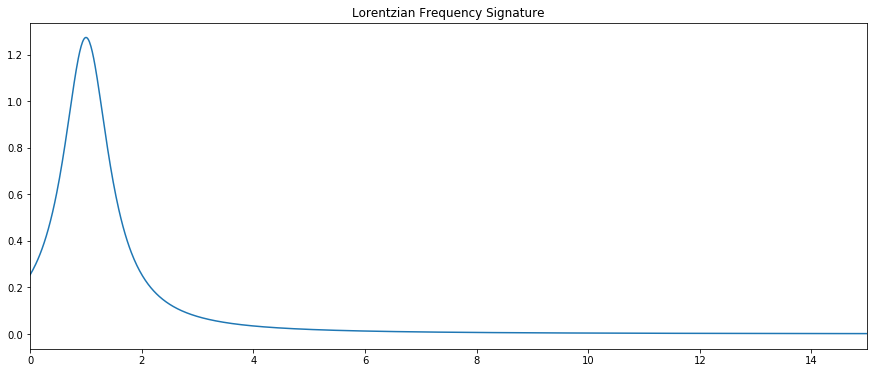

In [7]:
figsize(15,6)
def lorentzian(w, w0, g):
    return (1/pi) * (g/2) / ( (w-w0)**2 + (g/2)**2 )
w = linspace(0, 125, 10000)
plot(w, 2*lorentzian(w, 1, 1))
title('Lorentzian Frequency Signature')
xlim(0,15)

5.305039848886455e-05


C:\Users\jgoet\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


(0.3266726044941383, 3000)

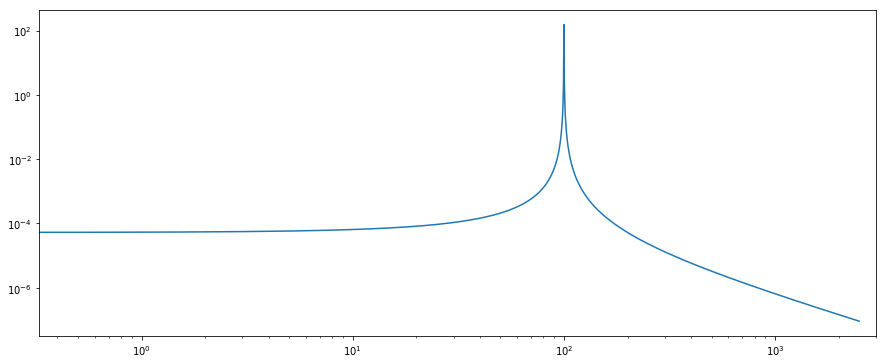

In [5]:
w = linspace(0, 2500, 5000) ##frequency

noise = 0.2/(w+1)*randn(len(w))

noisefreq = 50*randn(1)+1
noiseamp = 10*(randn(1)+1)
noisewidth = 5*(randn(1)+1)
lockin = 30*lorentzian(w, 100,0.11)
alias0 = zeros_like(noise)
alias1 = zeros_like(noise)

for freq, amp, width in zip(noisefreq, noiseamp, noisewidth):
    noise  += absolute(amp)*lorentzian(w, absolute(freq), absolute(width))
    alias0  += 0.1*absolute(amp)*lorentzian(w, 1250+absolute(freq), absolute(width))
    alias1  += 0.1*absolute(amp)*lorentzian(w, 1250-absolute(freq), absolute(width))

# f = (1/(w+300) + lockin + noise + alias0 + alias1)#*exp(-1j*pi*rand(len(w)))
f = lockin
print(f[1])
loglog(w, f)
xlim(0,3000)

-0.031033137677315137


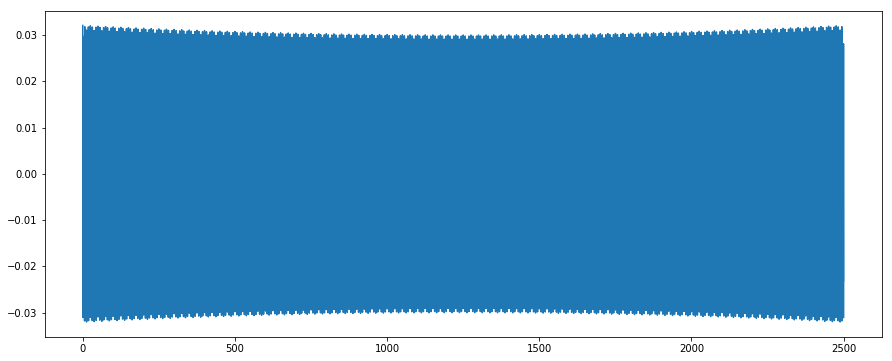

In [6]:
data = stmpy.tools.ifft(f)
secs = linspace(0,len(data)/2,len(data))
inst_phase = np.unwrap(np.angle(hilbert(data)))
plot(secs, data)
print(data[1])

In [7]:
# fftdata = stmpy.tools.fft(data)
fftdata = (np.diff(instantaneous_phase)/(2.0*np.pi) * 2)
loglog(fftdata)
xlim(0,3000)
print(fftdata[1])

NameError: name 'instantaneous_phase' is not defined

In [ ]:
instantaneous_phase = np.unwrap(np.angle(hilbert(fftdata)))
plot(instantaneous_phase)
xlim(0,3000)


In [ ]:
# fft of 0(t)*exp(-gamma*t)*sin(wt)
# random shifting of start of phase
# position frequencies
# gamma = frequency/ bandwidth
# q factor
# do it in the dtime domain 
# A(t)*sin(wt + psy)
# where a(t) is the magnitude of the waveform with time
# include phase slip
# make something that looks similar to the current data
# meet with Kaylie